# US Medical Insurance Cost Project 

#### Portfolio project made during Data Science Funtadions II course at Codecademy
Sebastian Hsiao. version: Dec 02, 2023 

A csv file provided by Codecademy will be investigated in this project.The file contains medical records observations on "age, sex, bmi, children, smoker, region, charges".
## Project Goals
- Check the file for inconsistency
- Find how the observations of the patients impact the insurance costs
- Perform descriptive analysis on the given data
- Made a list of suggestions and recommendations to reduce the medical insurance costs based on the result obtained

In [1]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

figsize = (20, 5)


In [2]:
# import data
insurance_list_dict = []
with open('insurance.csv', newline='') as insurance_csv_file:
    insurance_csv_dict = csv.DictReader(insurance_csv_file)
    for row in insurance_csv_dict:
        insurance_list_dict.append(row)
insurance_list_dict[0]

{'age': '19',
 'sex': 'female',
 'bmi': '27.9',
 'children': '0',
 'smoker': 'yes',
 'region': 'southwest',
 'charges': '16884.924'}

In [3]:
# unpack list observations ages, sexes, bmis, children, smokers, regions, charges
ages, sexes, bmis, children, smokers, regions, charges = [], [], [], [], [], [], []

for i in insurance_list_dict:
    ages.append(int(i['age']))
    sexes.append(i['sex'])
    bmis.append(float(i['bmi']))
    children.append(int(i['children']))
    smokers.append(str(i['smoker']))
    regions.append(i['region'])
    charges.append(float(i['charges']))


In [4]:
print(ages[0], sexes[0], bmis[0], children[0], smokers[0], regions[0], charges[0])
print(type(ages[0]), type(sexes[0]), type(bmis[0]), type(children[0]), type(smokers[0]), type(regions[0]), type(charges[0]))

19 female 27.9 0 yes southwest 16884.924
<class 'int'> <class 'str'> <class 'float'> <class 'int'> <class 'str'> <class 'str'> <class 'float'>


In [5]:
conv_dict = {'age': int, 'sex': str, 'bmi': float, 'children': int, 'smoker': str, 'region': str, 'charges': float}
insu_df = pd.DataFrame(insurance_list_dict).astype(conv_dict)

In [6]:
# dataframe types
insu_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# check for data inconsistency
print(insu_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [8]:
# summary statistics
insu_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Check data ranges
print(f"Age range: Min: {insu_df['age'].min()}, Max: {insu_df['age'].max()}")
print(f"Sex range: {insu_df['sex'].unique()}")
print(f"BMI range: Min: {insu_df['bmi'].min()}, Max: {insu_df['bmi'].max()}")
print(f"Children range: Min: {insu_df['children'].min()}, Max: {insu_df['children'].max()}")
print(f"Smoker range: {insu_df['smoker'].unique()}")
print(f"Region range: {insu_df['region'].unique()}")
print(f"Insurance Cost range: Min: {insu_df['charges'].min()}, Max: {insu_df['charges'].max()}")

Age range: Min: 18, Max: 64
Sex range: ['female' 'male']
BMI range: Min: 15.96, Max: 53.13
Children range: Min: 0, Max: 5
Smoker range: ['yes' 'no']
Region range: ['southwest' 'southeast' 'northwest' 'northeast']
Insurance Cost range: Min: 1121.8739, Max: 63770.42801


### Descriptive analysis

#### Data file
There are seven columns in the file representing age, sex, bmi, children, smoker, region and charges for each person in row. Three columns contain categorical data: sex, smoker and region, the rest of the columns are numerical. No missing data has been detected, all variables in records are within reasonable limits.


There are 1338 records describing some anonymous US citizens in the file.


Next I want to check out every variable for value distribution.


#### AGE

##### Conclusion
The distribution of ages frequency have seemingly the same spread on range between 18 and 64 y.o., with the ages 18 and 19 doubled in number of records regarding the other in the data.

The recorded data shows groups of ages as following:
    - No records belong to teenager groups for medical insurance.
    - 50.4% of records belong to young-adults between ages 18 to 29
    - 41.1% of records belong to adult stage between ages 30 to 59
    - 8.5% of records belong to elderly stage higher than 60 y.o.

The biggest distribution of record ages are represented by young-adults within 18 and 29 y.o. following by adults within 30 and 59 y.o. 


The ages in the file are spread between 18 and 64 years. The records are distributed between ages almost uniformely. There are around 26 records for each age except for the first two, containing 69 and 68 records respectively.

18 and 19 year records are overrepresented in the data and they must be reduced to approximately 26 records each (if the dataset will be further used for quantitative modeling with the age as a parameter under consideration).


In [10]:
# Mean, Min, Max Age in the data
print("Average age:", round(insu_df['age'].mean()))
print("Youngest age:", round(insu_df['age'].min()))
print("Oldest age", round(insu_df['age'].max()))


Average age: 39
Youngest age: 18
Oldest age 64


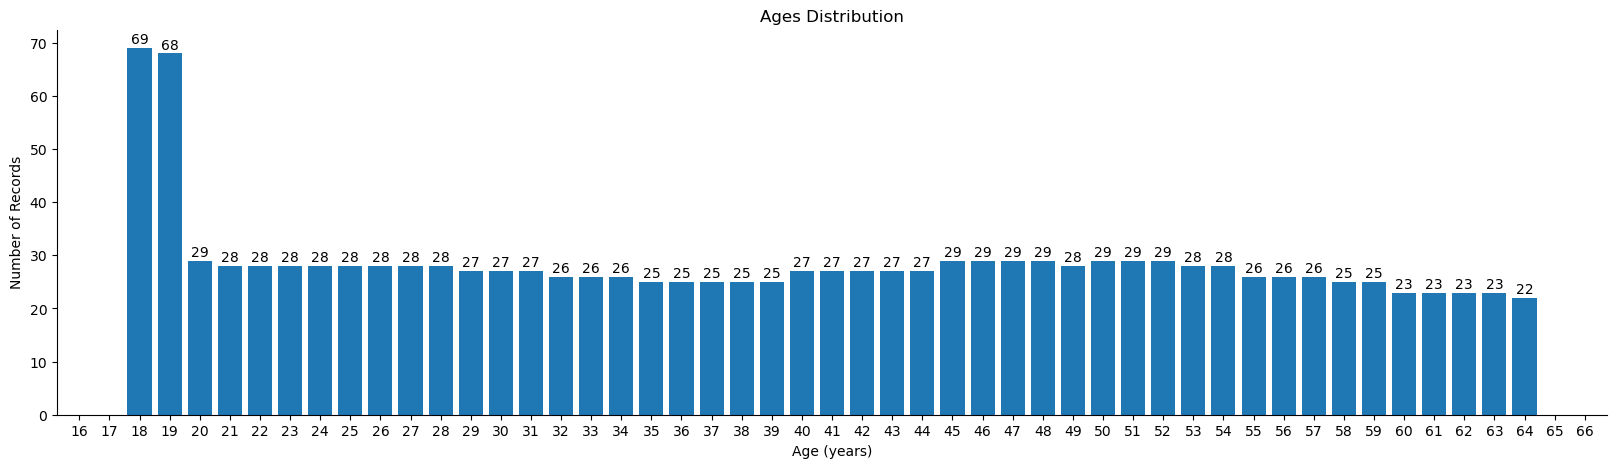

In [11]:
# plot histogram on Age observations
ages_count = {x:list(insu_df['age']).count(x) for x in list(set(insu_df['age']))}

plt.figure(figsize=(20, 5))
ax = plt.axes()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
bar_container = plt.bar(ages_count.keys(), ages_count.values())
plt.bar_label(bar_container, ages_count.values(), label_type='edge', padding=1)
plt.xlabel('Age (years)')
plt.ylabel('Number of Records')
plt.title('Ages Distribution')
plt.xticks(range(16,67))

plt.show()


In [12]:
# Ages group distribution ratio
insu_df['age'] = insu_df['age'].astype('int')
bins=[-1,15,40,60,80]
labels = ['0-17', '18-29', '30-59', '60-90']
binned_values = np.histogram(insu_df['age'], bins=bins)[0].tolist() # use [0] to just get the counts
df_hist = pd.DataFrame.from_dict(dict(zip(labels, binned_values)), orient='index').reset_index()
df_hist.columns = ['ranges', 'counts']
val_ratio = [round(x / np.sum(binned_values)*100,1) for x in binned_values]
df_hist['ratio'] = val_ratio
df_hist


,ranges,counts,ratio
0,0-17,0,0.0
1,18-29,674,50.4
2,30-59,550,41.1
3,60-90,114,8.5


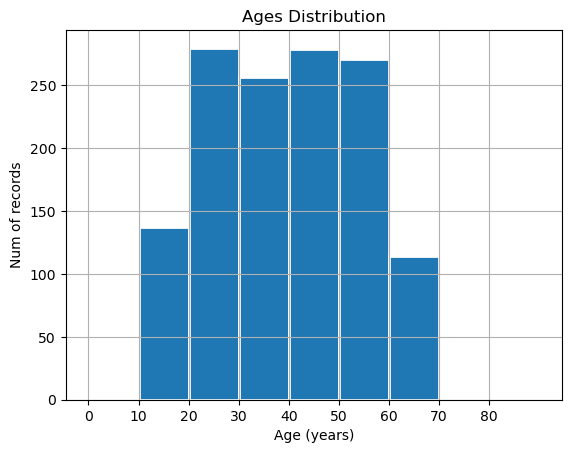

In [13]:
# Ages range distribution histogram
insu_df.hist('age', bins=[0,10,20,30,40,50,60,70,80,90], linewidth=2, edgecolor='white')
plt.title('Ages Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Num of records')
plt.xticks([0,10,20,30,40,50,60,70,80])
plt.show()

#### SEX

##### Conlusion
The genre distribution reflects almost the same proportion for females and males in the recorded data

The data are quite balanced in terms of the ratio of men and women.


In [14]:
# sex
insu_df['sex'].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

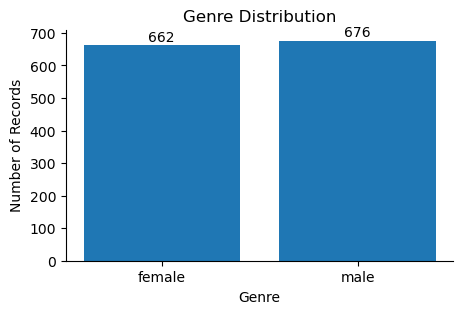

In [15]:
# Genres distribution bar plot
sexes_count = {x:list(insu_df['sex']).count(x) for x in list(set(insu_df['sex']))}

plt.figure(figsize=(5, 3))
ax = plt.axes()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

bar_container = plt.bar(sexes_count.keys(), sexes_count.values())
plt.bar_label(bar_container, sexes_count.values(), label_type='edge', padding=1)
plt.xlabel('Genre')
plt.ylabel('Number of Records')
plt.title('Genre Distribution')

plt.show()

In [16]:
# Genre distribution ratio
male_count = 0
for i in range(len(sexes)):
    if sexes[i] == 'male':
        male_count += 1
print(f"There are {male_count} male and {len(sexes) - male_count} female records in the data ({100 * (len(sexes) - male_count) / len(sexes):.1f}% females).")

There are 676 male and 662 female records in the data (49.5% females).


#### BMI
##### Conclusion
The BMI distribution is almost symmetrical with center at 29 and spread between 15 and 50. The distribution is slightly skewed to the right which is almost invisible to the eye. There are also few outliers with BMI > 50.

The distribution maximum is on the border between overweight and obese ranges. The healthy range contain only 16.8% of all records, while overweight and obese make up 81.7% of records.

In [17]:
# bmi
insu_df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

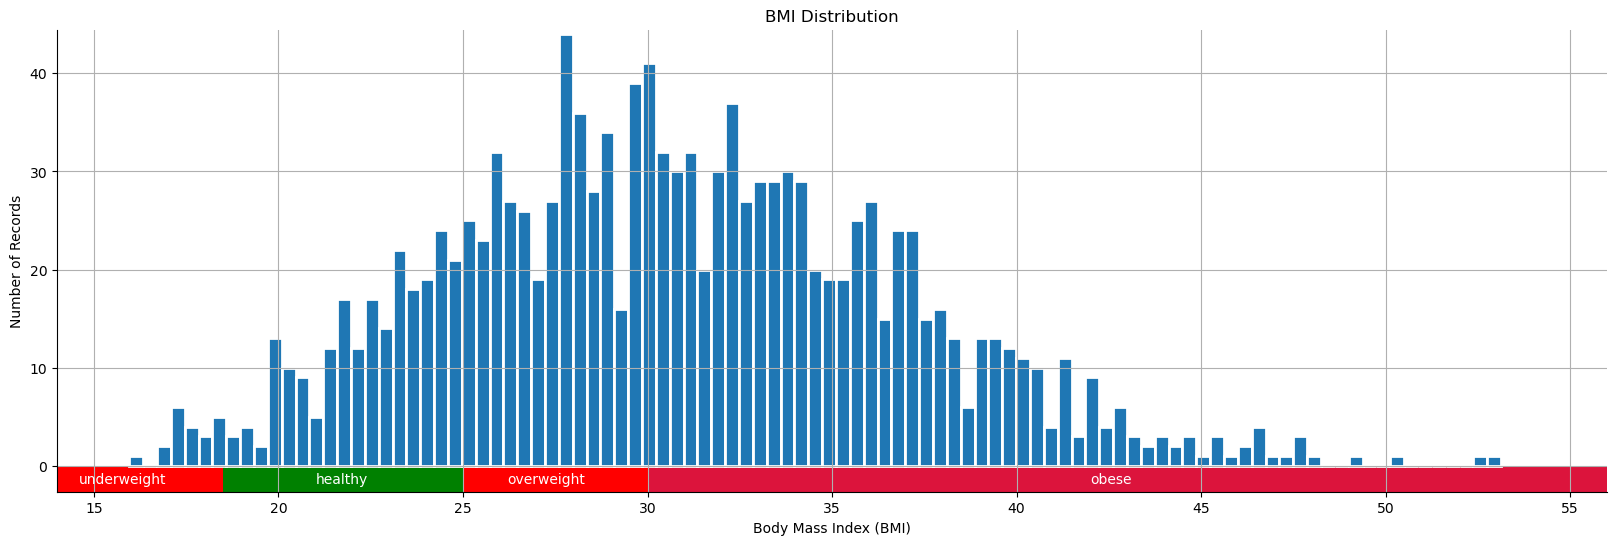

Number of records in categories:
  underweight: 20   ( 1.5%)
  healthy:     225  (16.8%)
  overweight:  386  (28.8%)
  obese:       707  (52.8%)


In [18]:
# BMI spread from patients
bin_edges = np.linspace(np.min(bmis), np.max(bmis),100)

counts, bins = np.histogram(bmis, bin_edges)
the_width = bins[1] - bins[0]
plt.figure(figsize=(20, 6))
ax = plt.axes()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.grid()
ax.set_xlim(14.0, 56)
ax.set_ylim(bottom=-0.06*max(counts), top=1.01*max(counts))
ymin, ymax, text_level = 0, 0.06 / 1.11, -0.04*max(counts)
ax.axvspan(13, 18.5, ymin=ymin, ymax=ymax, facecolor='red')
ax.text(14.6, text_level, 'underweight', color='white')
ax.axvspan(18.5, 25, ymin=ymin, ymax=ymax, facecolor='green')
ax.text(21, text_level, 'healthy', color='white')
ax.axvspan(25, 30, ymin=ymin, ymax=ymax, facecolor='red')
ax.text(26.2, text_level, 'overweight', color='white')
ax.axvspan(30, 56, ymin=ymin, ymax=ymax, facecolor='crimson')
ax.text(42, text_level, 'obese', color='white')

plt.hist(bmis, bins=bin_edges, linewidth=2, edgecolor='white')

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Number of Records')
plt.title('BMI Distribution')
plt.xticks()

plt.show()

def count_in_limits(the_list, min, max):
    """count the number of values in the list which has values between min and max"""
    count = 0
    for i in range(len(the_list)):
        if the_list[i] >= min and the_list[i] < max:
            count += 1
    return count

print("Number of records in categories:")
underw = count_in_limits(bmis, 0, 18.5)
print(f"  underweight: {str(underw).ljust(4)} ( {100 * underw / len(bmis):.1f}%)")
healthy = count_in_limits(bmis, 18.5, 25)
print(f"  healthy:     {str(healthy).ljust(4)} ({100 * healthy / len(bmis):.1f}%)")
overw = count_in_limits(bmis, 25, 30)
print(f"  overweight:  {str(overw).ljust(4)} ({100 * overw / len(bmis):.1f}%)")
obese = count_in_limits(bmis, 30, 60)
print(f"  obese:       {str(obese).ljust(4)} ({100 * obese / len(bmis):.1f}%)")

#### CHILDREN
##### Conclusion
The possible number of children are between 0 and 5. Persons with no children constitute the largest group of records: 574 persons (2/5 of all records). The higher the number of children - the less records are in the file.

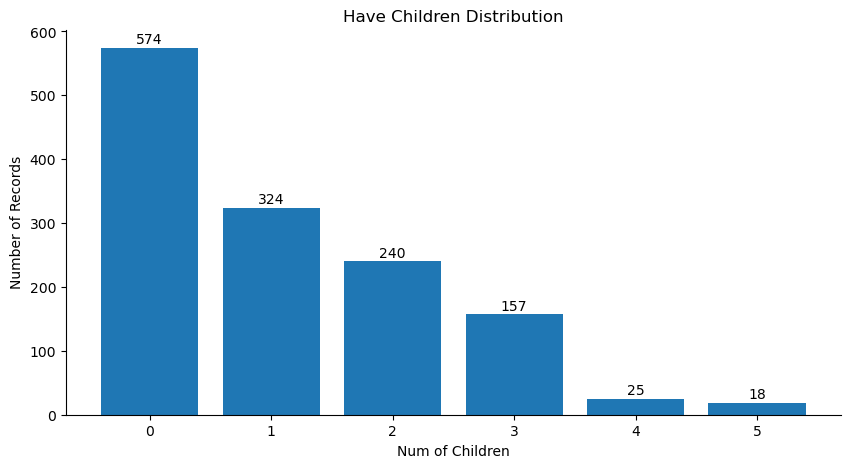

In [19]:
# plot histogram on Num of Children observation
children_count = {x:list(insu_df['children']).count(x) for x in list(set(insu_df['children']))}

plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
bar_container = plt.bar(children_count.keys(), children_count.values())
plt.bar_label(bar_container, children_count.values(), label_type='edge', padding=1)
plt.xlabel('Num of Children')
plt.ylabel('Number of Records')
plt.title('Have Children Distribution')
plt.xticks()

plt.show()

#### COST OF INSURANCE
Visualizing the cost of insurance spread in the data

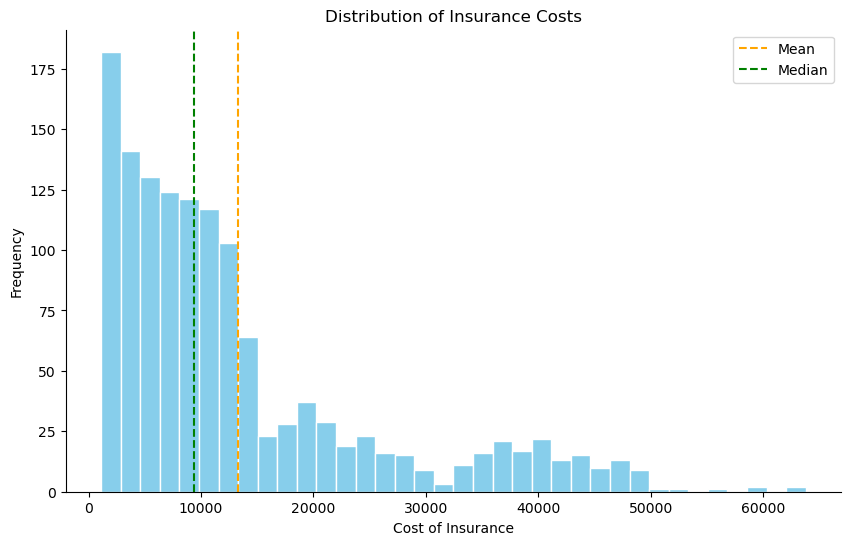

In [20]:
# Assuming 'charges' is the column representing charges in the 'insu_df' DataFrame
charges = insu_df['charges']

# Determining the number of bins dynamically based on the data range
num_bins = int(np.sqrt(len(charges)))  # Square root choice for number of bins

plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Creating the histogram with improved settings
plt.hist(charges, bins=num_bins, color='skyblue', edgecolor='white')

# Calculating mean and median for vertical lines
mean_charge = np.mean(charges)
median_charge = np.median(charges)

# Plotting vertical lines for mean and median
plt.axvline(mean_charge, color='orange', linestyle='dashed', linewidth=1.5, label='Mean')
plt.axvline(median_charge, color='green', linestyle='dashed', linewidth=1.5, label='Median')

plt.xlabel('Cost of Insurance')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance Costs')
plt.legend()

plt.show()


#### COST IMPACT BY VARIABLES
Cost impact by 'Smoker', 'Have Children', 'Obesity', 'Region'

Cost-to-Variable scatter plots in order to visualize a correlation between them:


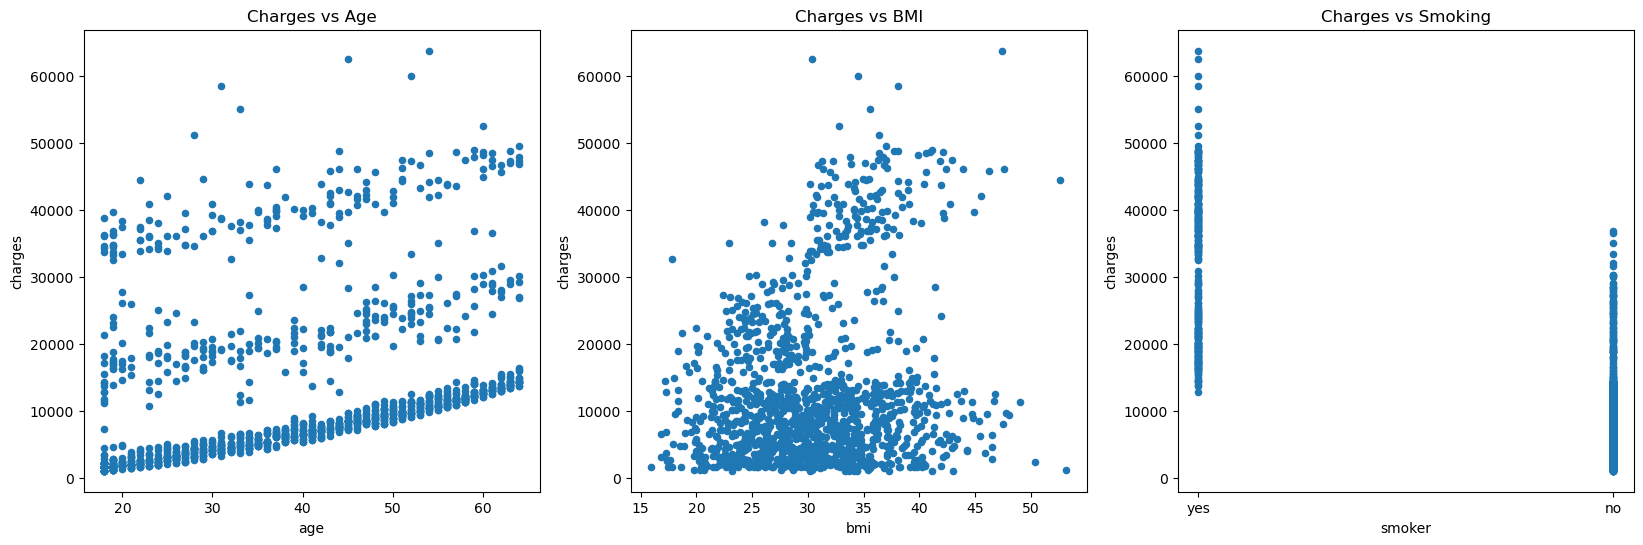

In [21]:
# read the file to dataframe
# so plotting data would be easier below
df = pd.read_csv('insurance.csv')

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6))
df.plot.scatter(y='charges', x='age', title='Charges vs Age', ax=ax1)
df.plot.scatter(y='charges', x='bmi', title='Charges vs BMI', ax=ax2)
df.plot.scatter(y='charges', x='smoker', title='Charges vs Smoking', ax=ax3)
plt.show()

Some plots show correlation between variables:

#### Charges vs Age

The charges-age correlation is clearly visible on the plot. Insurance cost depend on age in nonlinear manner (see how data points form an arc on the bottom of the plot, which corresponds to the minimal charges). Although the arc is not strongly curved, one can say that there is nonlinear penalty for age, older persons pay slightly more money for insurance than it may be predicted using linear age coefficient. The minimal insurance cost for older persons is for at least 13000 larger than for the youngest ones.

Above "the ark" there are two similar groups of records, which correlates with the shape of insurance costs distribution shown above. I'll get back to this later in the report.

The clear charges-age correlation show that the age is among the main factors which influence insurance cost

#### Charges vs BMI

There is no strong visual correlation between charges and bmi, though slight positive correlation can be suggested. It is worth mention that the data is not balanced by bmi values among the records, so no strong visible correlation should not be expected in this case.

#### Charges vs Smoking

This plot shows that the minimal insurance cost is higher for at least 11000 USD for those who smokes.

The data segregation in "charges distribution" plot may be caused by other variable, which have strong influence on charges.

In order to check this hypothesis I'll try to plot charges distribution dividing smokers and non-smokers is separate categories. 

In [22]:
# smoker
insu_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

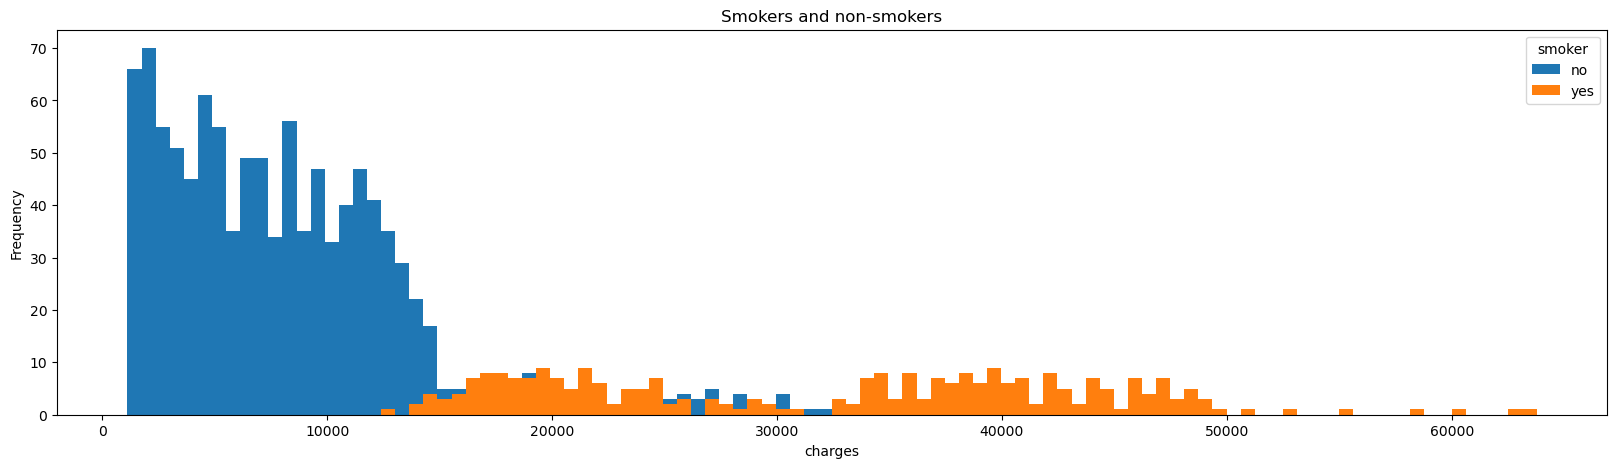

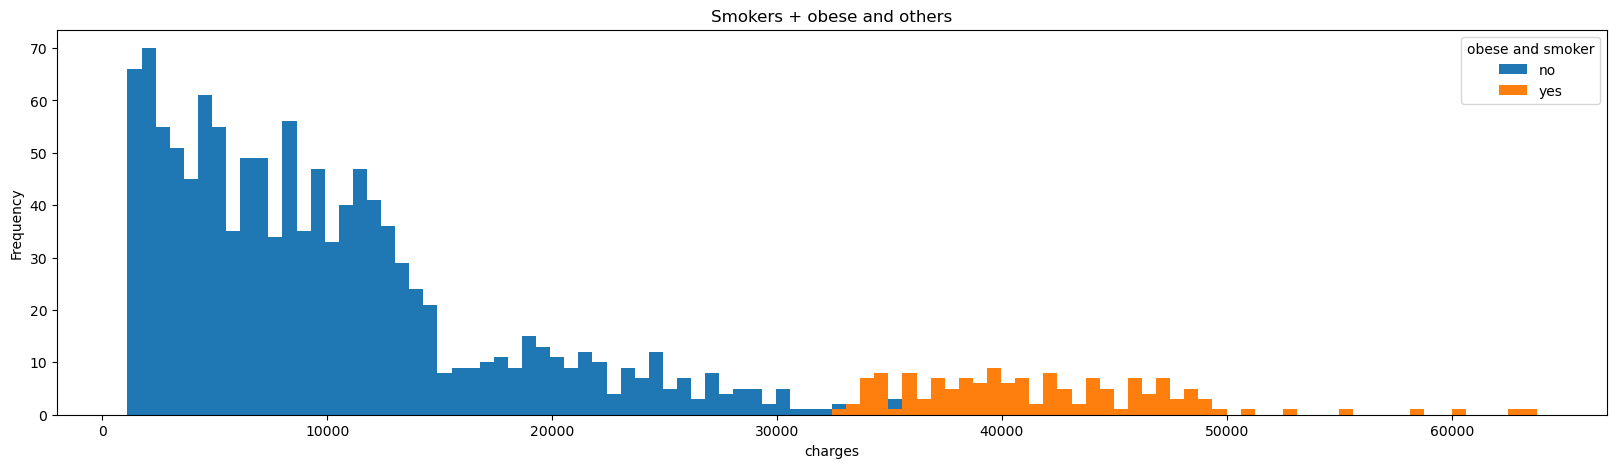

In [23]:
# convert categorical variables to numerical values
df.smoker = pd.Categorical(df.smoker)
df['smoker_n'] = df.smoker.cat.codes
df['obese and smoker'] = df.apply(lambda row: 'yes' if row.smoker_n == 1 and row.bmi > 30 else 'no', axis=1)

df.pivot(columns='smoker', values='charges').plot.hist(bins=100, title='Smokers and non-smokers', figsize=figsize)
plt.xlabel('charges')
plt.show()

df.pivot(columns='obese and smoker', values='charges').plot.hist(bins=100, title='Smokers + obese and others', figsize=figsize)
plt.xlabel('charges')
plt.show()

The last two plots explain why charges distribution is divided into three ranges. The first range (less than 15000 USD) belong to non-smoking persons. The next range (15000 .. 31000 USD) belong to those who smoke but their BMI is below 30, which is below obese category. And the last range (above 31000 USD) contain records of persons who are both obese and smokers.

There are also few records of non-smokers, which lie above 15000 USD border (see the "Smokers and non-smokers" plot). I haven't found the reason for that while analyzing the data. There may be some other factors which can increase the charges, other than those found in the data file.

## Health insurance cost reduction recommendations

Having in mind the information shown above one may infer a list of suggestions which can lower the cost of health insurance.

One cannot change all the variables at our will. For example the age only increases with time, there is no way at the moment to get younger. Region , number of children and sex is out of possible discussion here due to obvious reasons.

So any recommendations should only address smoking and obesity. In the order of importance:

**1. Quit smoking (if you haven't already)**

**2. Keep your weight in healthy range**